# Weather

In [3]:
import os
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 16
plt.style.use('ggplot')

In [4]:
metrics = ['cloudCover','dewPoint','humidity','pressure','temperature','visibility','windSpeed']

hive_names = ['Cohort 1', 'Cohort 2', 'Experiment 4', 'Normal Hive']
weather_files = ['../results/2_weather.csv', '../results/3_weather.csv', '../results/4_weather.csv', '../results/1_weather.csv']

weather_df_list = []
for file in weather_files:
    df = pd.read_csv(file, comment='#', header = 0)
    weather_df_list.append(df)

print(weather_df_list[0].dtypes)
weather_df_list[0].head()

apparentTemperature    float64
cloudCover             float64
date                    object
dewPoint               float64
hour                   float64
humidity               float64
precipType              object
pressure               float64
temperature            float64
time_period             object
visibility             float64
windBearing            float64
windSpeed              float64
dtype: object


,apparentTemperature,cloudCover,date,dewPoint,hour,humidity,precipType,pressure,temperature,time_period,visibility,windBearing,windSpeed
0,19.400000,0.000000,2016-02-26,12.720000,NaN,0.664286,rain,1012.294286,19.400000,night,9.980,197.285714,1.692857
1,26.071429,0.310000,2016-02-26,9.255714,NaN,0.358571,rain,1014.447143,26.835714,day,11.362,220.000000,2.835714
2,17.311429,0.666667,2016-02-27,13.911429,NaN,0.805714,rain,1017.654286,17.311429,night,9.980,109.714286,2.495714
3,21.164286,0.916667,2016-02-27,13.742857,NaN,0.628571,rain,1019.222857,21.164286,day,9.980,67.857143,3.130000
4,16.374286,0.666667,2016-02-28,13.510000,NaN,0.834286,rain,1017.848571,16.374286,night,9.980,76.428571,1.985714


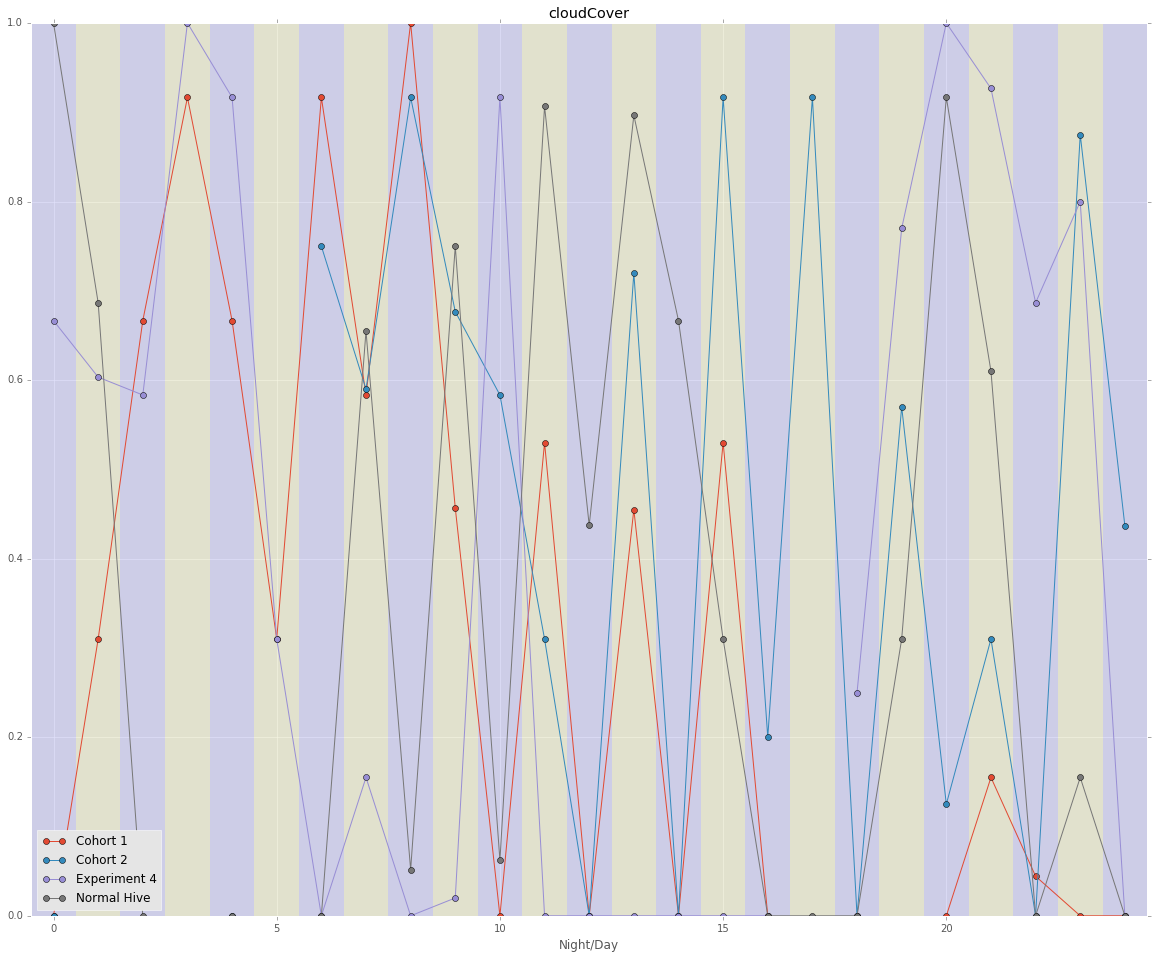

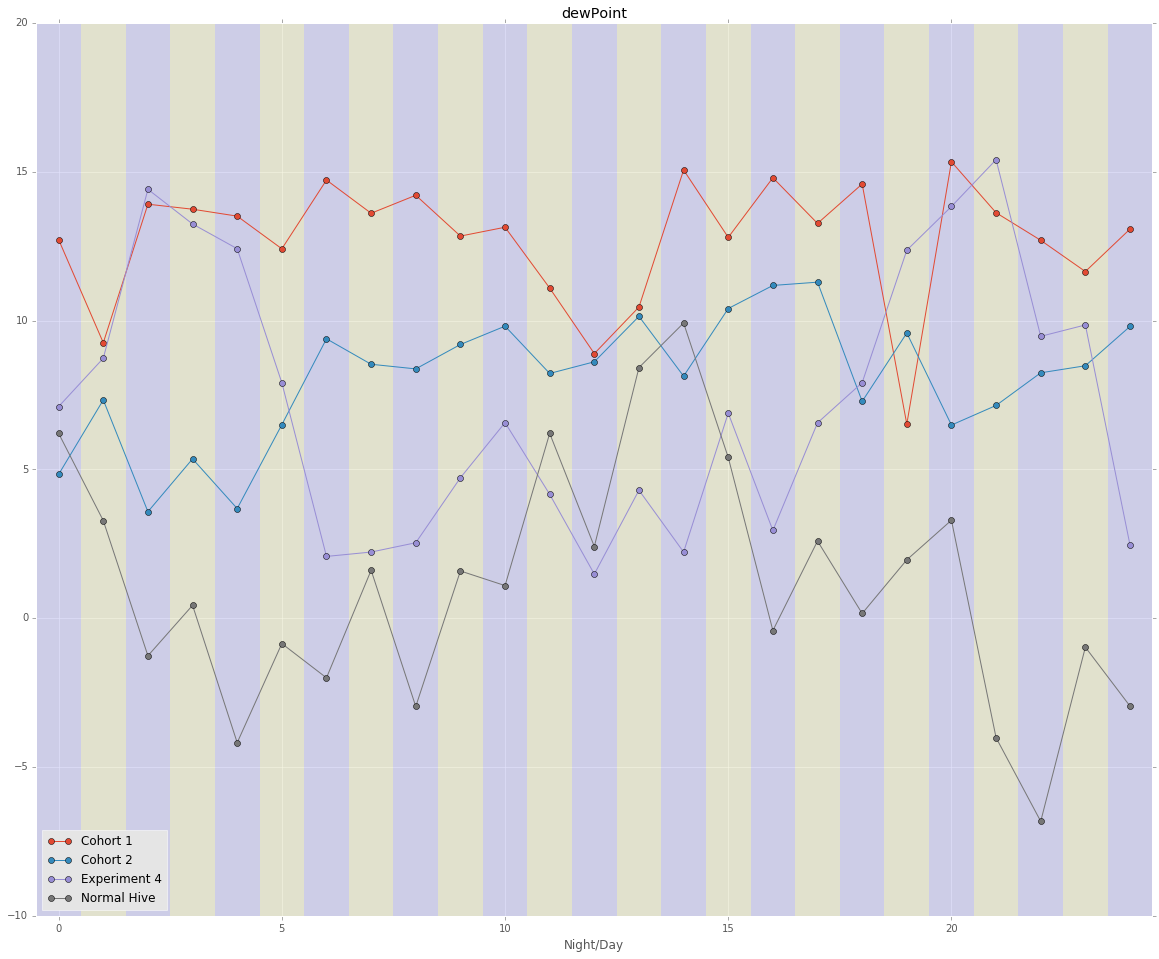

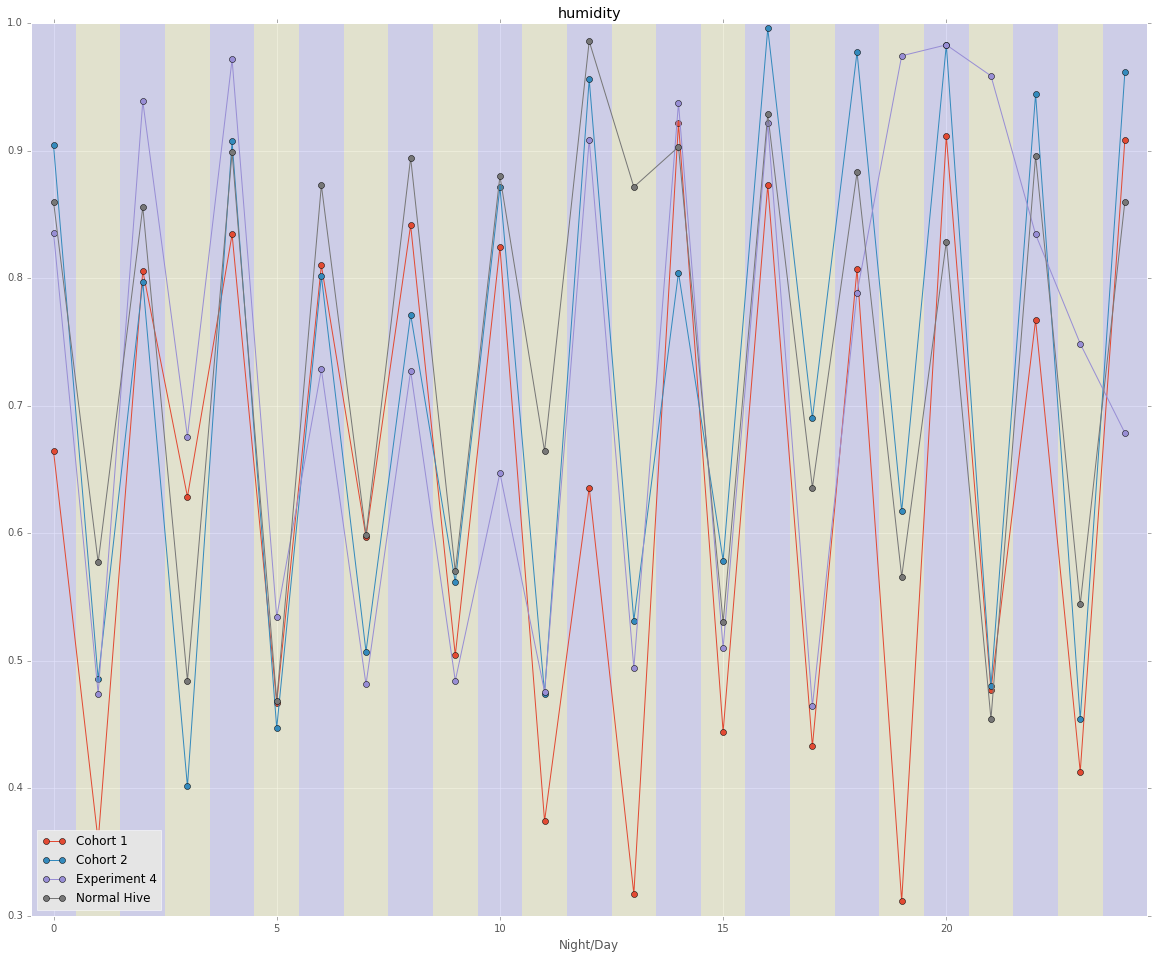

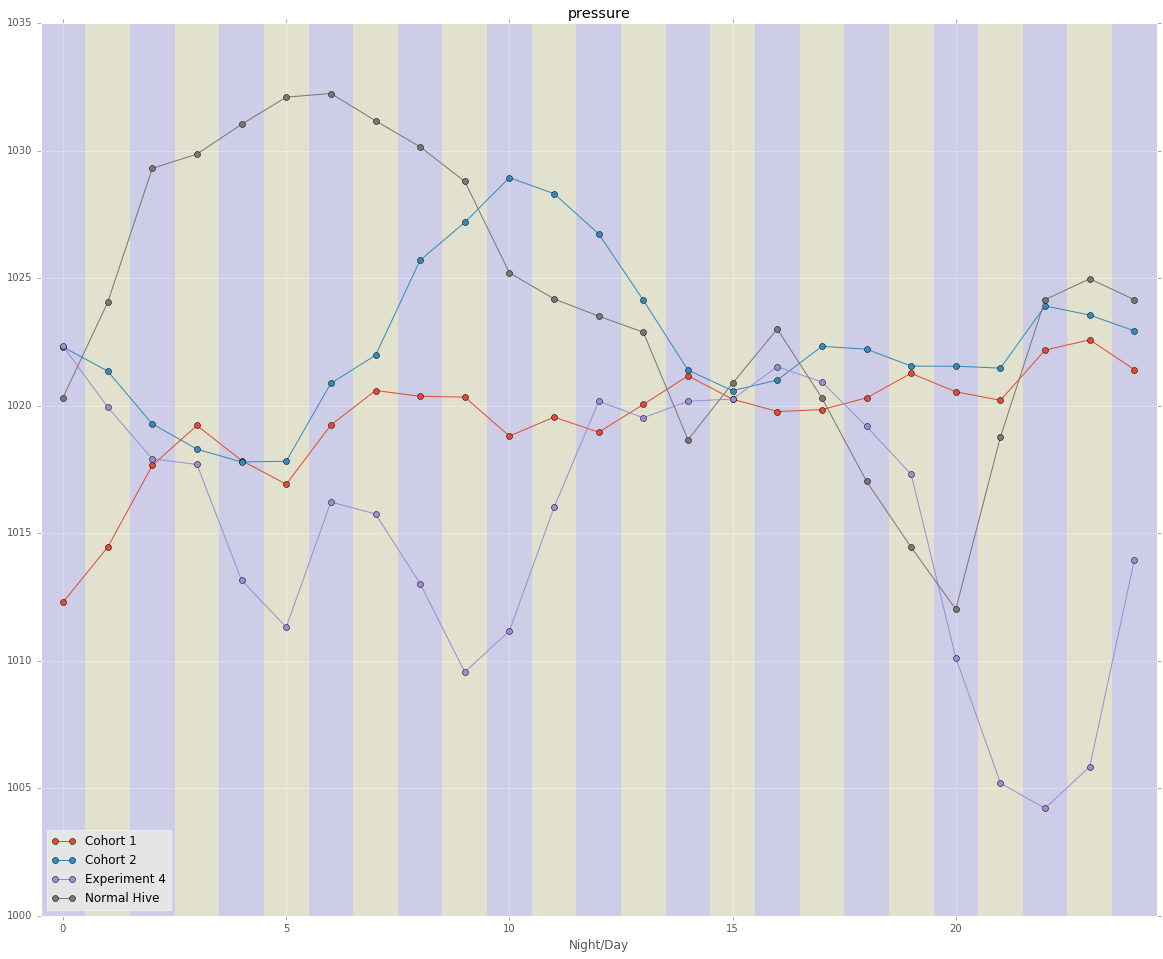

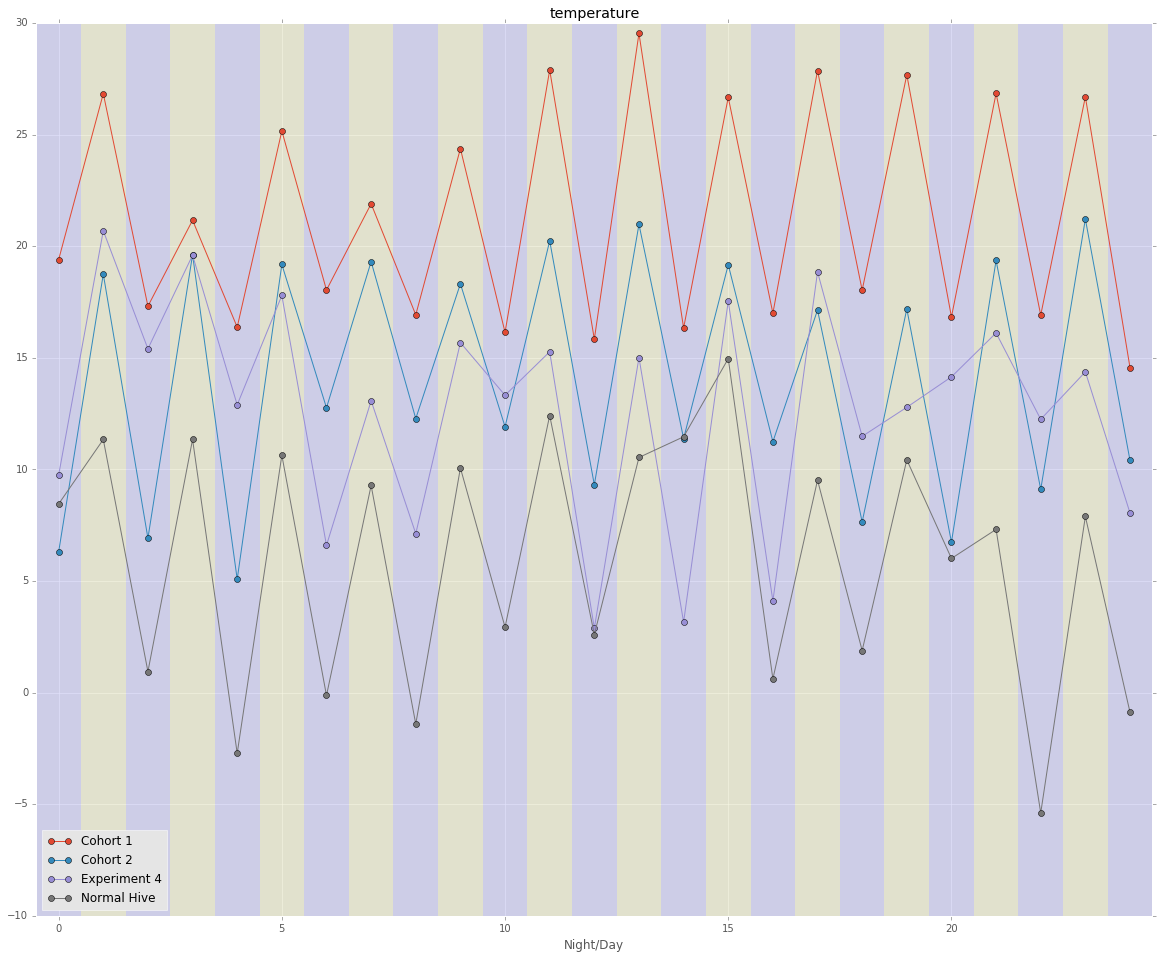

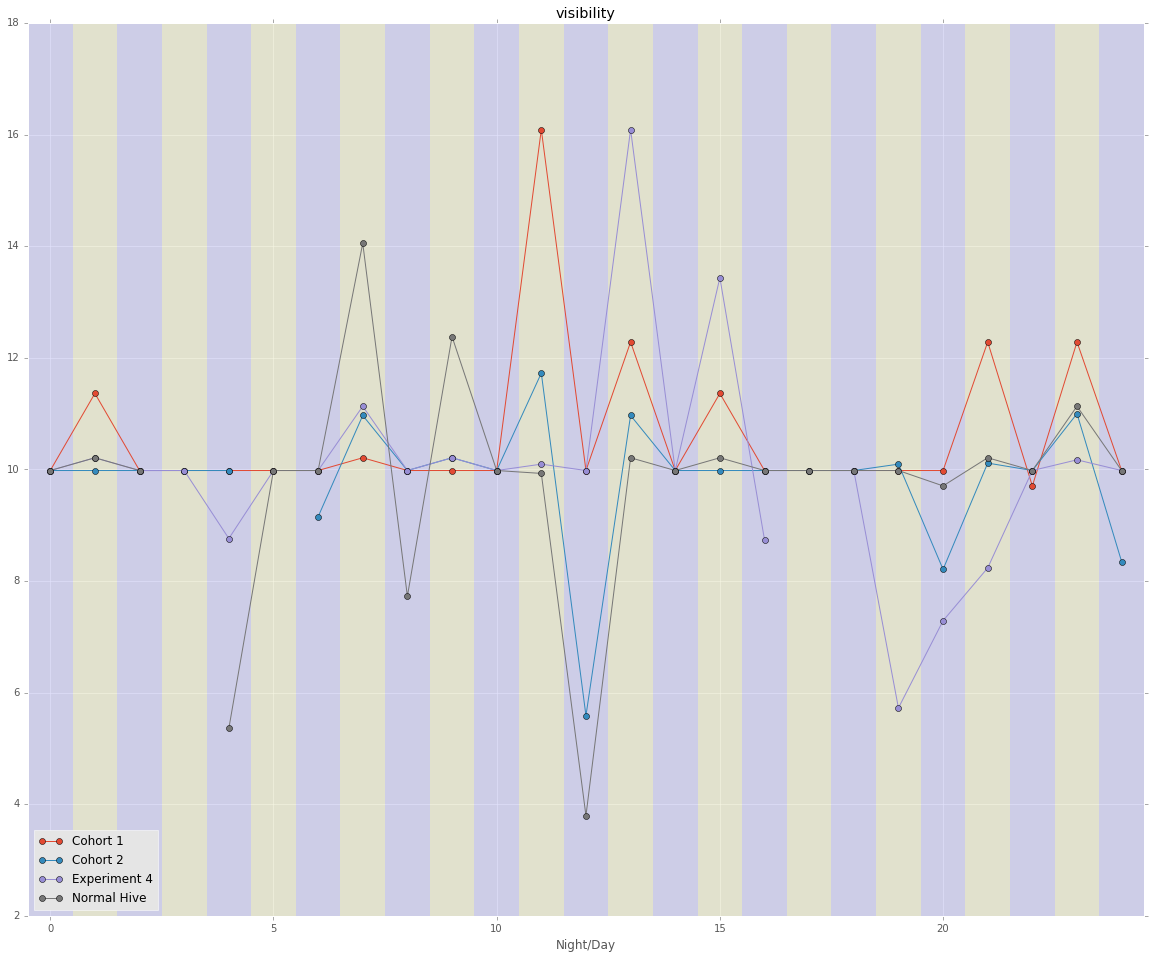

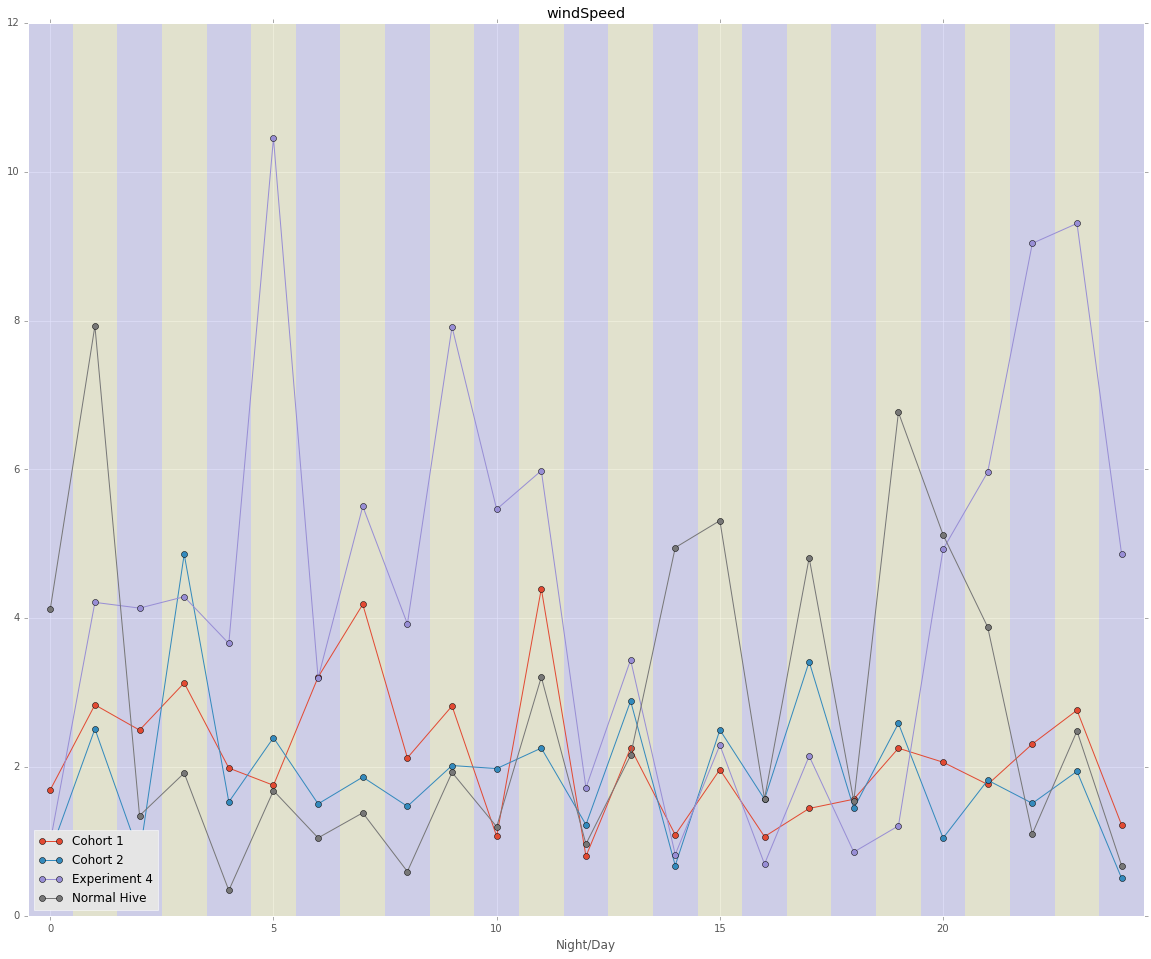

In [3]:
for metric in metrics:

    for i, df in enumerate(weather_df_list):
        plt.plot(df[metric][0:25], marker='o', label='{}'.format(hive_names[i]))
    plt.title(metric)
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='lower left')

    for j, time_period in enumerate(weather_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

In [4]:
experiment_files = ['results/2_output.csv', 'results/3_output.csv', 'results/4_output.csv', 'results/1_output.csv']

experiment_df_list = []
for file in experiment_files:
    df = pd.read_csv(file, comment='#', header = 0)
    experiment_df_list.append(df)

print(experiment_df_list[0].dtypes)

real_result_df_list = []
for df in experiment_df_list:
    real_df = df[df['result_type'] == 'real'].reset_index()
    del real_df['index']
    del real_df['Unnamed: 0']
    real_result_df_list.append(real_df)

Unnamed: 0             int64
day_num                int64
result_type           object
speed_diff_mean      float64
speed_diff_median    float64
speed_mean           float64
speed_median         float64
spread               float64
spread_diff          float64
time_period           object
dtype: object


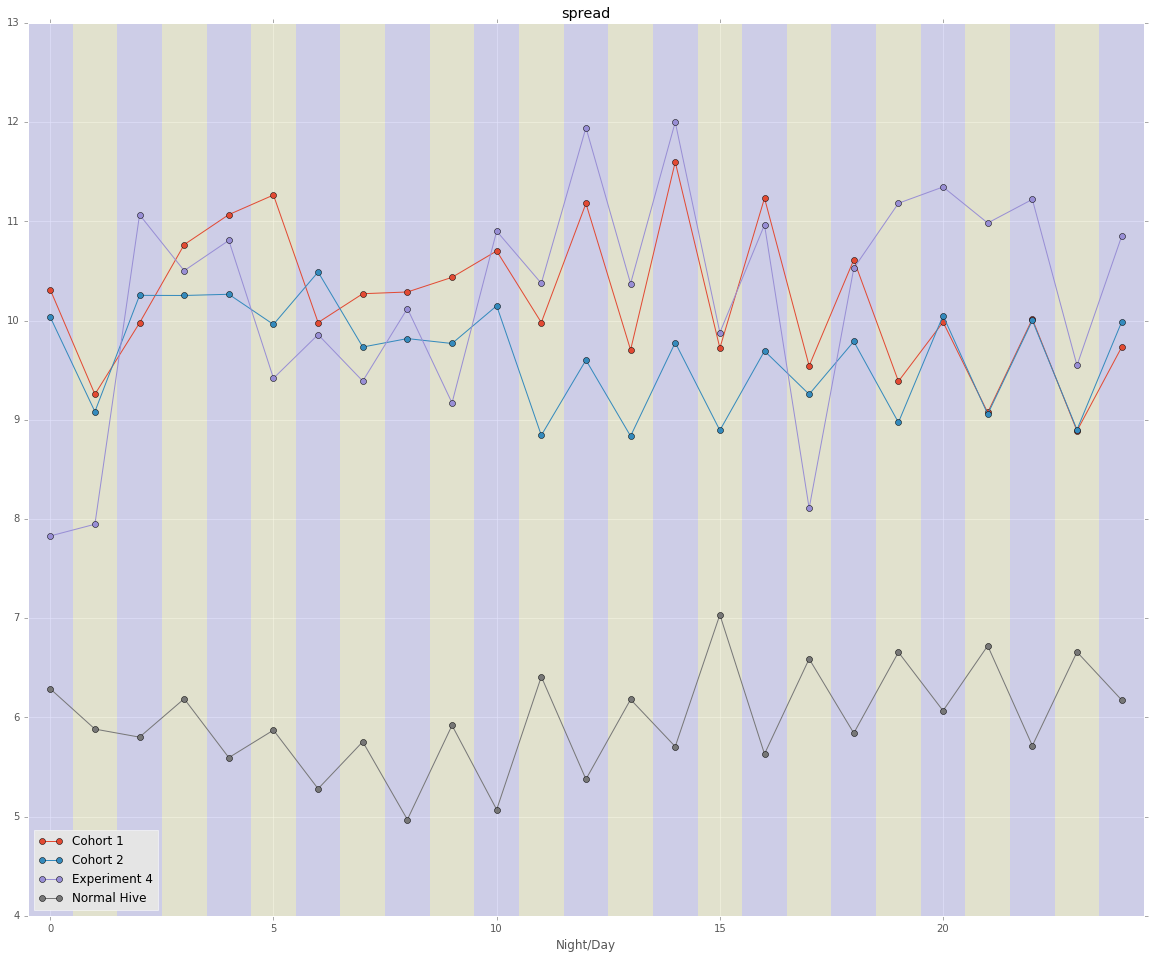

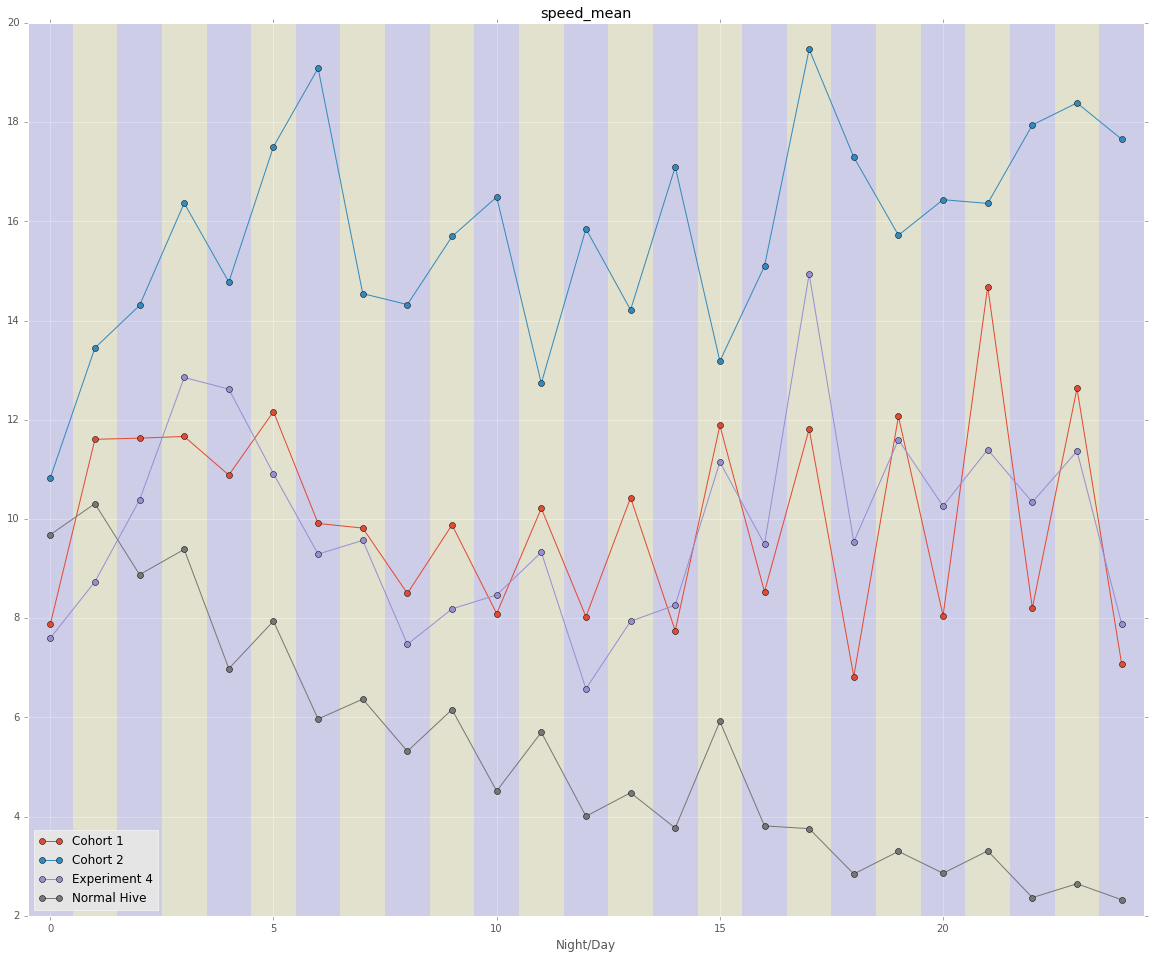

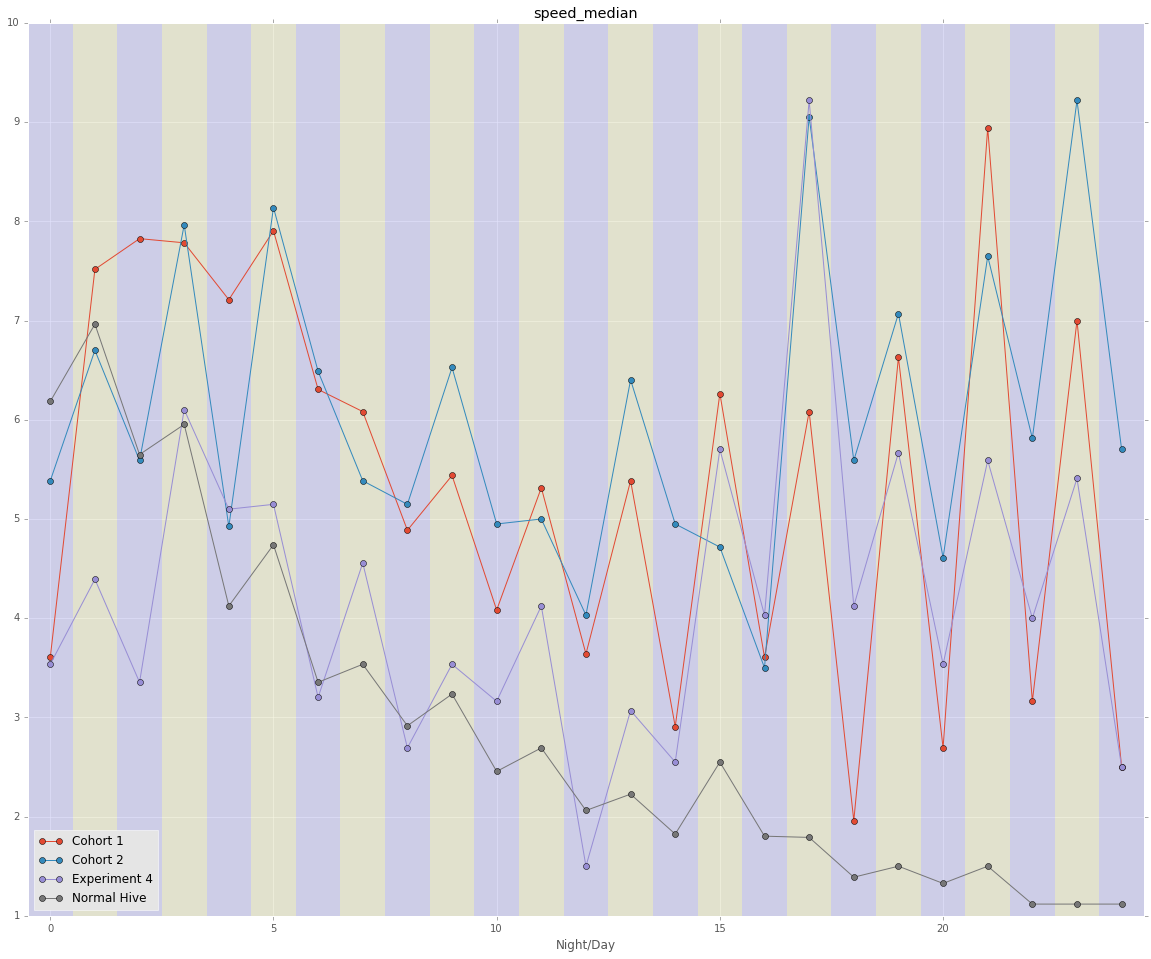

In [5]:
for metric in ['spread', 'speed_mean', 'speed_median']:

    for i, df in enumerate(real_result_df_list):
        plt.plot(df[metric][0:25], marker='o', label='{}'.format(hive_names[i]))
    plt.title(metric)
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='lower left')

    for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

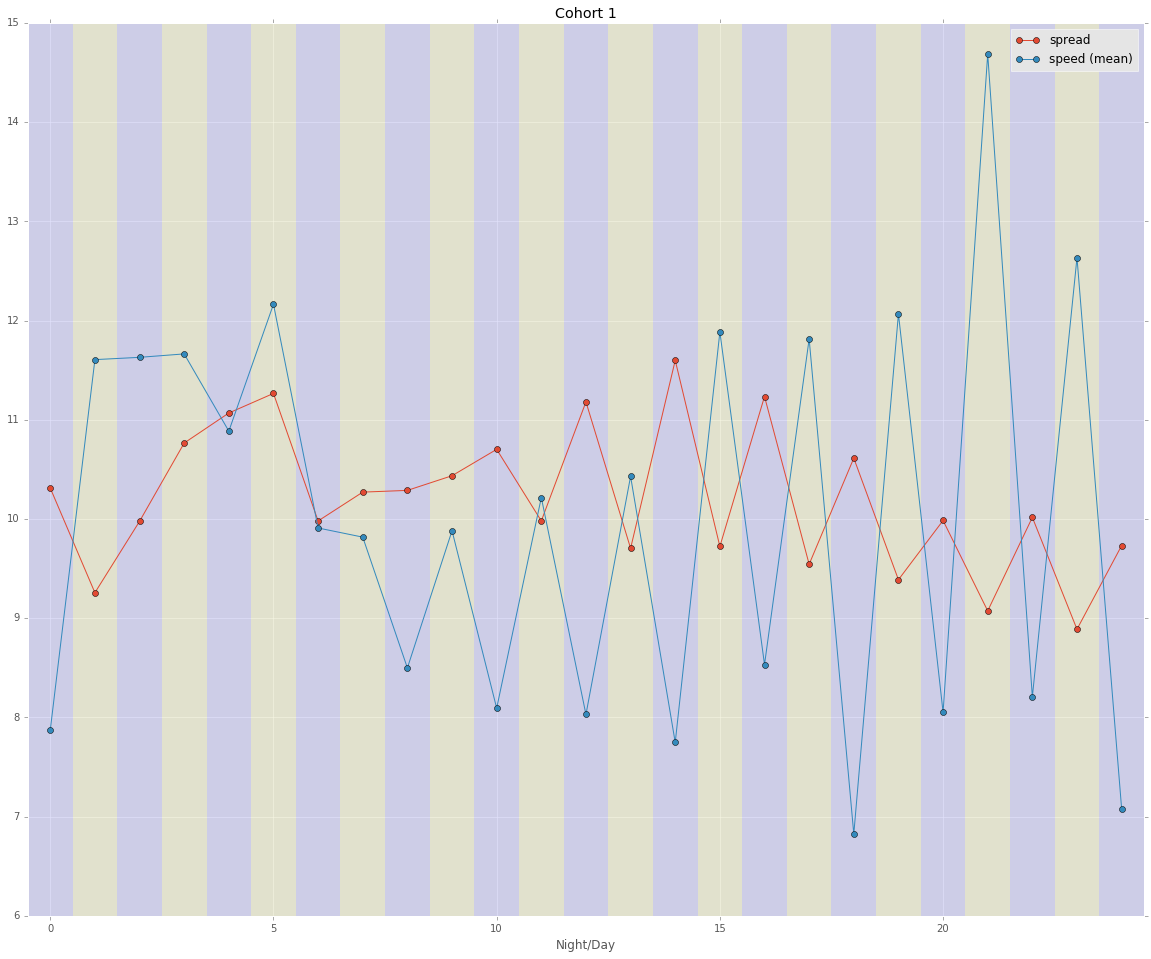

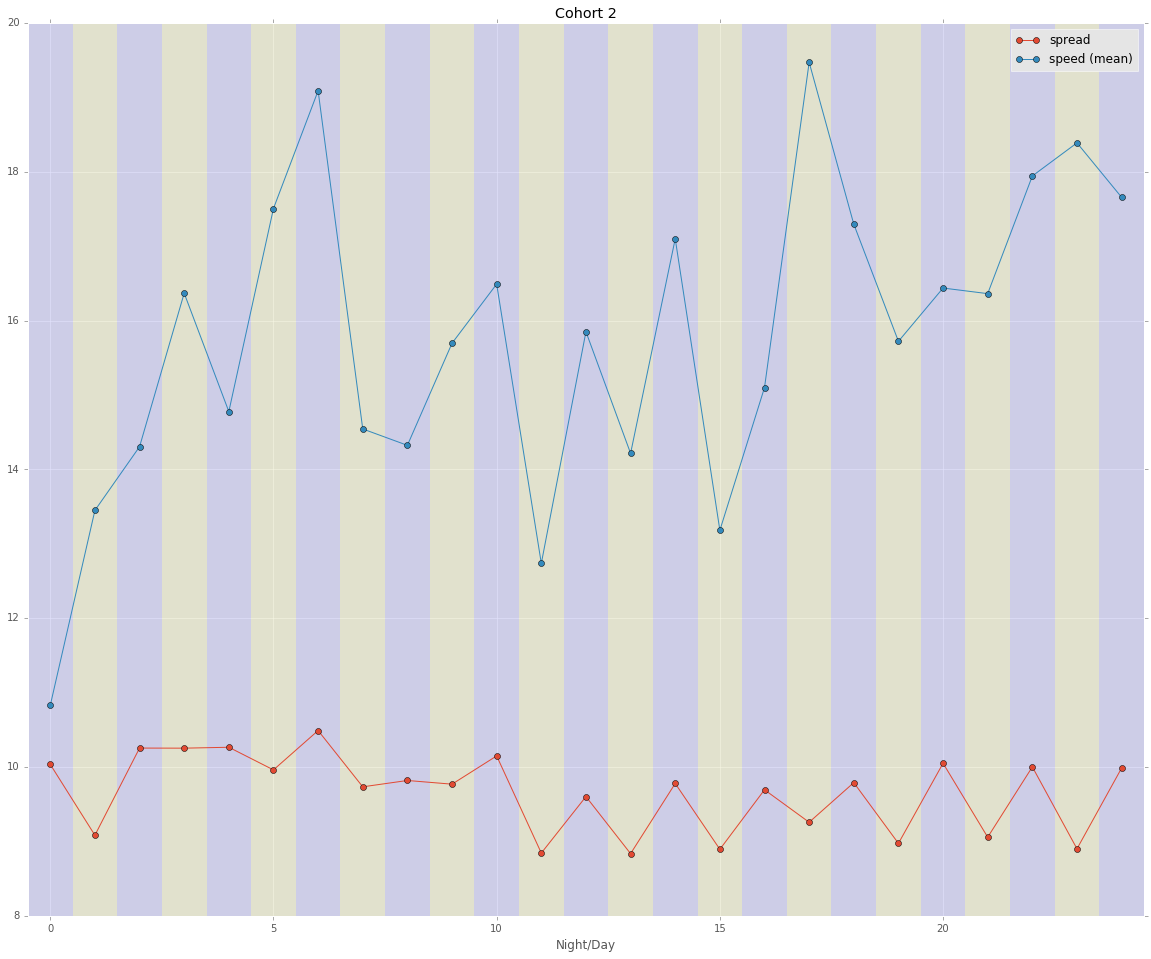

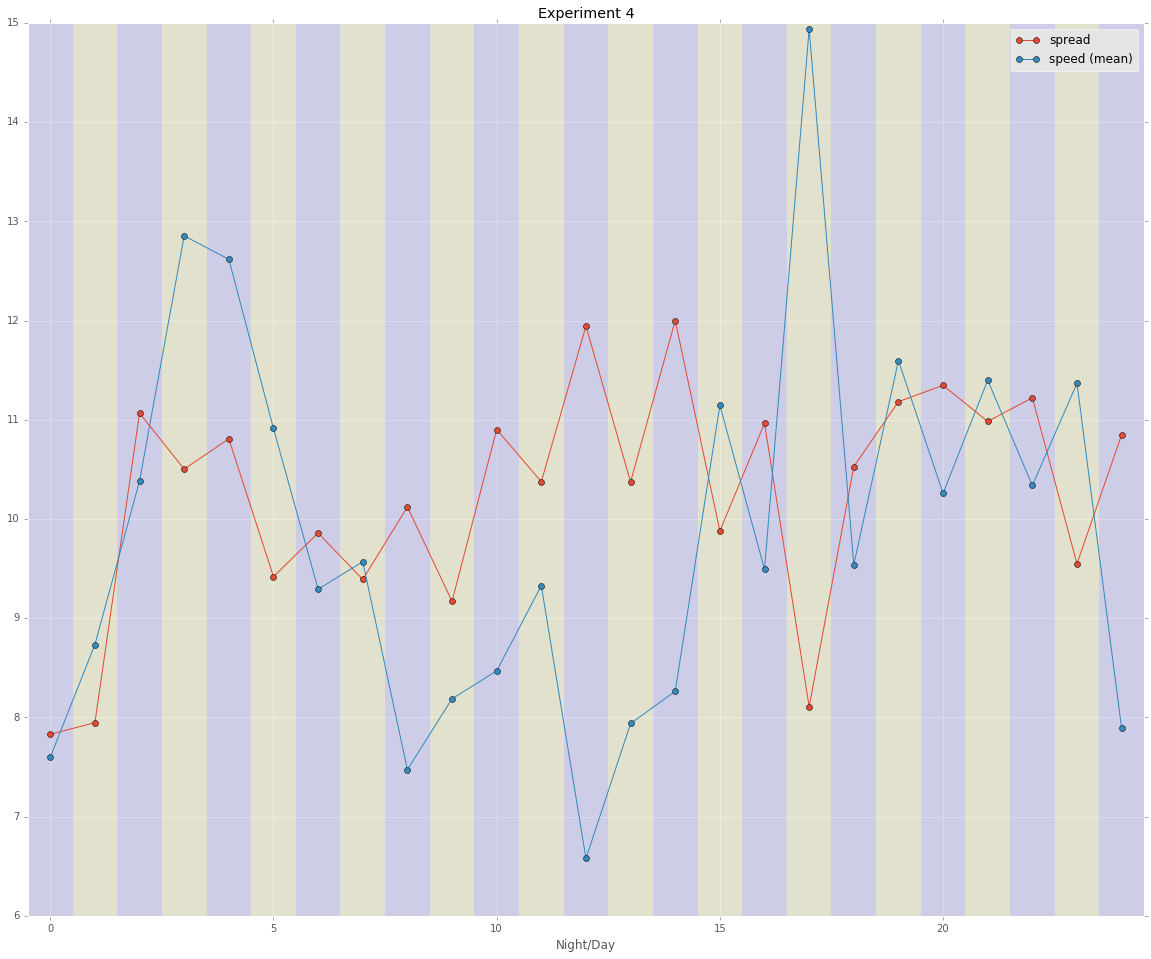

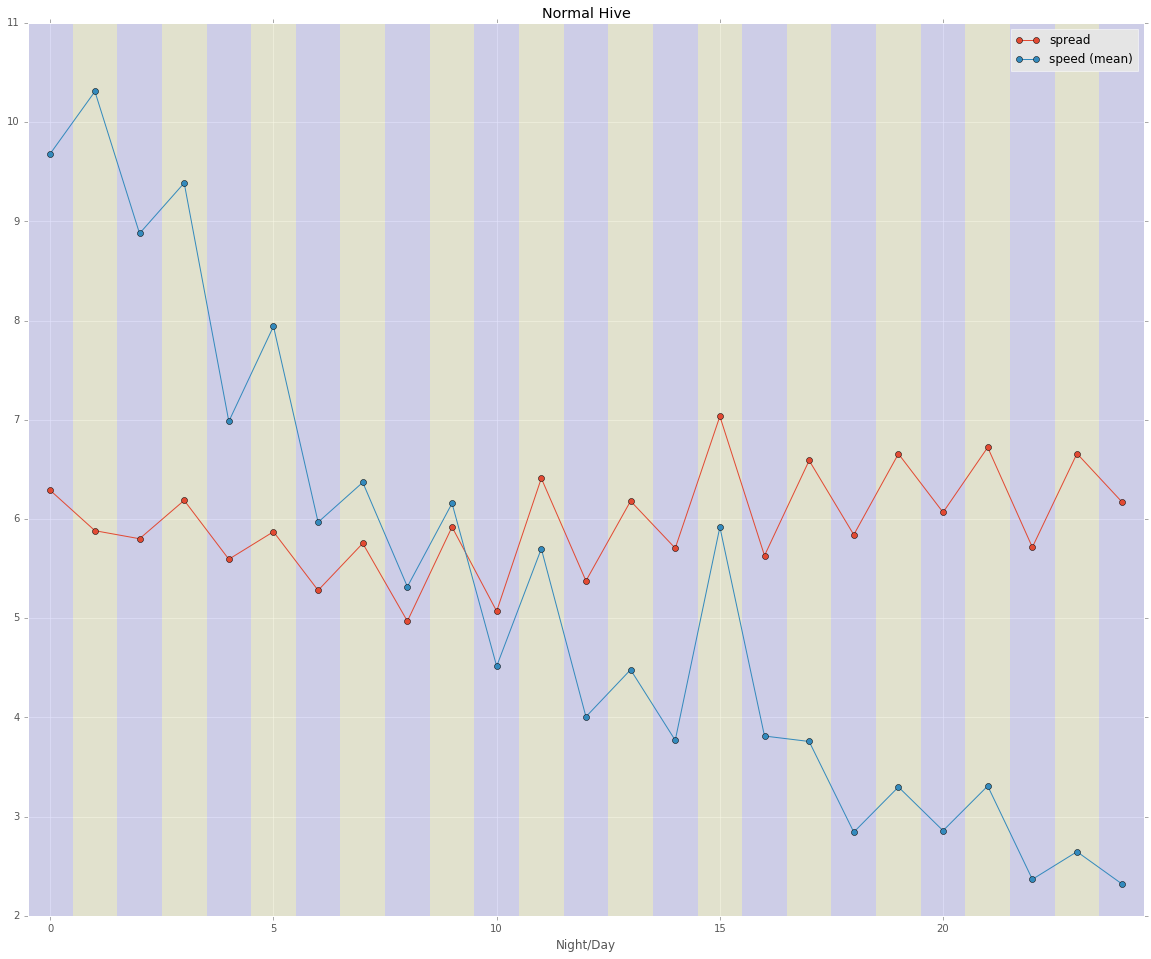

In [9]:
for i, df in enumerate(real_result_df_list):
    plt.plot(df['spread'][0:25], marker='o', label='spread')
    plt.plot(df['speed_mean'][0:25], marker='o', label='speed (mean)')
    #plt.plot(df['speed_median'][0:25], marker='o', label='speed (median)')
    
    #plt.plot(weather_df_list[i]['temperature'][0:25], marker='o', label='temperature')
    #plt.plot(weather_df_list[i]['humidity'][0:25], marker='o', label='humidity')
    #plt.plot(weather_df_list[i]['dewPoint'][0:25], marker='o', label='dewPoint')
    #plt.plot(weather_df_list[i]['windSpeed'][0:25], marker='o', label='windSpeed')
    #plt.plot(weather_df_list[i]['cloudCover'][0:25], marker='o', label='cloudCover')
    #plt.plot(weather_df_list[i]['visibility'][0:25], marker='o', label='visibility')
    
    plt.title(hive_names[i])
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')

    for j, time_period in enumerate(weather_df_list[i]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()